# POKEMON

### Analitika kitabxanalarının yüklənməsi və Datasetin Gətirilməsi

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_excel(r"C:\Users\Rahima\Desktop\Pokemon.xlsx")
df

,#,name,type1,type2,base_total,hp,attack,defense,sp_attack,sp_defense,speed,height_m,weight_kg,is_legendary,generation,capture_rate,base_happiness,percentage_male
0,1,Bulbasaur,grass,poison,318,45,49,49,65,65,45,0.7,6.9,0,1,45,70,88.1
1,2,Ivysaur,grass,poison,405,60,62,63,80,80,60,1.0,13.0,0,1,45,70,88.1
2,3,Venusaur,grass,poison,625,80,100,123,122,120,80,2.0,100.0,0,1,45,70,88.1
3,4,Charmander,fire,NaN,309,39,52,43,60,50,65,0.6,8.5,0,1,45,70,88.1
4,5,Charmeleon,fire,NaN,405,58,64,58,80,65,80,1.1,19.0,0,1,45,70,88.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Celesteela,steel,flying,570,97,101,103,107,101,61,9.2,999.9,1,7,25,0,NaN
796,797,Kartana,grass,steel,570,59,181,131,59,31,109,0.3,0.1,1,7,255,0,NaN
797,798,Guzzlord,dark,dragon,570,223,101,53,97,53,43,5.5,888.0,1,7,15,0,NaN
798,799,Necrozma,psychic,NaN,600,97,107,101,127,89,79,2.4,230.0,1,7,3,0,NaN


Datasetdə ən çox yayılmış Pokemon növü hansıdır? Bu tip nə qədər Pokemon var?

In [19]:
tiplər = pd.concat([df['type1'], df['type2']])
tip_sayı = tiplər.value_counts()
pokemon_növü = tip_sayı.idxmax()
tip_sayı = tip_sayı.max()

print(f'Ən çox yayılmış Pokemon növü: {pokemon_növü}')
print(f'Bu növə aid olan Pokemon sayı: {tip_sayı}')

Ən çox yayılmış Pokemon növü: water
Bu növə aid olan Pokemon sayı: 131


Digər növləri ilə müqayisədə həddindən artıq yüksək və ya aşağı statistikaya malik hər hansı Pokemon varmı?

In [53]:
stats = ['base_total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']

for stat in stats:
    mean_stat = df[stat].mean()
    std_stat = df[stat].std()
    
    outliers = df[(df[stat] > mean_stat + 2 * std_stat) | (df[stat] < mean_stat - 2 * std_stat)]
    
    if not outliers.empty:
        print(f"\nHəddindən artıq yüksək və ya aşağı {stat} dəyərinə malik Pokémon-lar:")
        print(outliers[['name', stat]])


Həddindən artıq yüksək və ya aşağı base_total dəyərinə malik Pokémon-lar:
          name  base_total
149     Mewtwo         780
190    Sunkern         180
247  Tyranitar         700
248      Lugia         680
249      Ho-Oh         680
288    Slaking         670
372  Salamence         700
375  Metagross         700
379     Latias         700
380     Latios         700
381     Kyogre         770
382    Groudon         770
383   Rayquaza         780
444   Garchomp         700
482     Dialga         680
483     Palkia         680
485  Regigigas         670
486   Giratina         680
492     Arceus         720
642   Reshiram         680
643     Zekrom         680
645     Kyurem         700
715    Xerneas         680
716    Yveltal         680
717    Zygarde         708
718    Diancie         700
719      Hoopa         680
789   Solgaleo         680
790     Lunala         680

Həddindən artıq yüksək və ya aşağı hp dəyərinə malik Pokémon-lar:
           name   hp
39   Wigglytuff  140
49    

#### Pokemonun capture rate ilə onun base total arasında əlaqə varmı? Bəs onun nadirliyi (legendary və ya deyil)?

In [57]:
k = df['capture_rate'].corr(df['base_total'])
print("Capture Rate və Base Total arasındakı korrelyasiya:", k)

Capture Rate və Base Total arasındakı korrelyasiya: -0.7121201962428764


Hansı Pokemon ən yüksək hücum statistikasına malikdir?

In [37]:
yüksək = df.loc[df['attack'].idxmax()]

print(f"Ən yüksək hücum statistikası olan Pokémon: {yüksək['name']}")

Ən yüksək hücum statistikası olan Pokémon: Heracross


Base total ilə HP, Attack, Defense, Special Attack, Special Defense və Speed kimi digər atributların hər biri arasında correlation nədir?

In [25]:
a = ['base_total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
korrelyasiya_matrix = df[a].corr()
korrelyasiya = korrelyasiya_matrix['base_total']
print(korrelyasiya)

base_total    1.000000
hp            0.621062
attack        0.729998
defense       0.630151
sp_attack     0.740986
sp_defense    0.717958
speed         0.547575
Name: base_total, dtype: float64


Əfsanəvi və əfsanəvi olmayan Pokemonun ortalama hücum  arasında əhəmiyyətli fərq varmı?

In [57]:
əfsanəvi = df[df['is_legendary'] == 1]['attack']
əfsanəvi_olmayan = df[df['is_legendary'] == 0]['attack']
əfsanəvi_hücum_dəyəri = əfsanəvi.mean()
əfsanəvi_olmayan_hücum_dəyəri = əfsanəvi_olmayan.mean()
print(f"Əfsanəvi Pokemonların orta hücum dəyəri: {əfsanəvi_hücum_dəyəri}")
print(f"Əfsanəvi olmayan Pokemonların orta hücum dəyəri: {əfsanəvi_olmayan_hücum_dəyəri}")
fərq = əfsanəvi_hücum_dəyəri - əfsanəvi_olmayan_hücum_dəyəri
print(f"Əfsanəvi və əfsanəvi olmayan Pokemonların ortalama hücum dəyərləri arasında fərq mövcuddur: {fərq}")

Əfsanəvi Pokemonların orta hücum dəyəri: 109.35714285714286
Əfsanəvi olmayan Pokemonların orta hücum dəyəri: 74.80684931506849
Əfsanəvi və əfsanəvi olmayan Pokemonların ortalama hücum dəyərləri arasında fərq mövcuddur: 34.55029354207437


Hansı tip 1 və tip 2 kombinasiyaları Pokemonlar arasında ən çox yayılmışdır?

In [31]:
kombinasiyalar = df.groupby(['type1', 'type2']).size().reset_index(name='count')
çox_yayılmış = kombinasiyalar.sort_values(by='count', ascending=False)
print(çox_yayılmış.head(1))

     type1   type2  count
91  normal  flying     26


Pokemonun çəkisi və boyu arasında korrelyasiya varmı?

In [29]:
çəki_boy_korrelyasiya = df['weight_kg'].corr(df['height_m'])
print(f'Pokemonların çəkisi və boyu arasındakı korrelyasiya: {çəki_boy_korrelyasiya}')

Pokemonların çəkisi və boyu arasındakı korrelyasiya: 0.626623070440067


Hansı nəsil (generation) ən yüksək ortalama sürətə malikdir?

In [59]:
ortalama_sürət = df.groupby('generation')['speed'].mean().reset_index()
c = ortalama_sürət.sort_values(by='speed', ascending=False)
print('Ən yüksək ortalama sürətə malik nəsil:')
print(c.head(1))

Ən yüksək ortalama sürətə malik nəsil:
   generation      speed
0           1  70.152318


Base total paylanması əfsanəvi və əfsanəvi olmayan Pokemon arasında necə dəyişir?

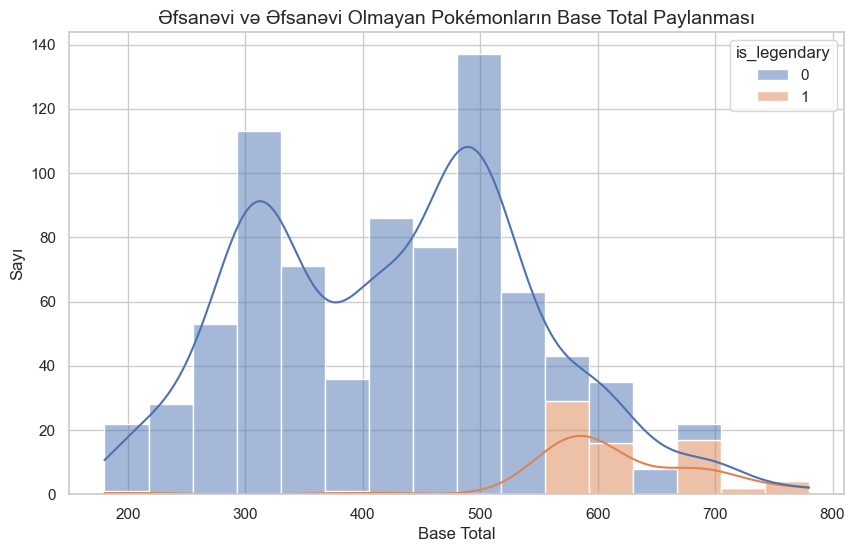

In [93]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='base_total', hue='is_legendary', multiple='stack', kde=True)
plt.title('Əfsanəvi və Əfsanəvi Olmayan Pokémonların Base Total Paylanması', fontsize=14)
plt.xlabel('Base Total', fontsize=12)
plt.ylabel('Sayı', fontsize=12)
plt.show()

Müxtəlif Pokemon tipləri arasında Defense paylanmasında əhəmiyyətli fərq varmı?

Hər bir Pokemon tipi üçün ortalama Defense dəyərləri:
       type1     defense
16     steel  120.208333
15      rock   97.090909
2     dragon   86.259259
10    ground   83.906250
8      ghost   79.518519
17     water   73.482456
11       ice   71.913043
9      grass   70.871795
0        bug   70.847222
1       dark   70.517241
13    poison   70.031250
14   psychic   69.264151
4      fairy   68.166667
6       fire   67.788462
5   fighting   66.392857
7     flying   65.000000
3   electric   61.820513
12    normal   59.695238


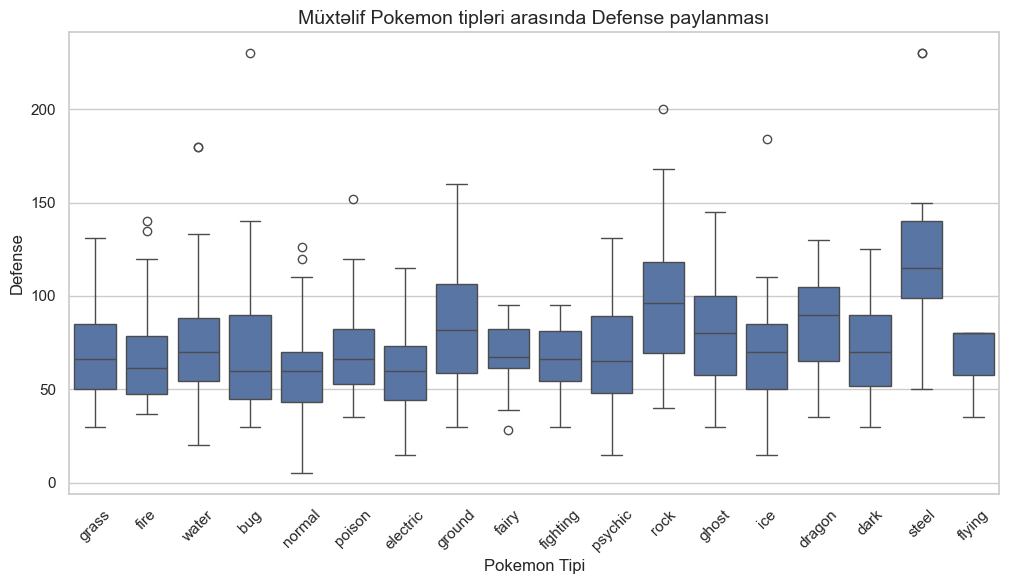

In [107]:
d = df.groupby('type1')['defense'].mean().reset_index()
e = d.sort_values(by='defense', ascending=False)
print("Hər bir Pokemon tipi üçün ortalama Defense dəyərləri:")
print(e)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='type1', y='defense')
plt.title('Müxtəlif Pokemon tipləri arasında Defense paylanması', fontsize=14)
plt.xlabel('Pokemon Tipi', fontsize=12)
plt.ylabel('Defense', fontsize=12)
plt.xticks(rotation=45)
plt.show()

#### Pokemonun adını input kimi qəbul edən və onun statistikalarının olduğu lüğətini qaytaran funksiya yazın.

In [113]:
def statistika(pokemon_adı):
    pokemon_adı = pokemon_adı.lower()
    pokemon_data = df[df['name'].str.lower() == pokemon_name]

    if pokemon_data.empty:
        return f"{pokemon_name.title()} yoxdur."
    stats = {
        'name': pokemon_data['name'].values[0],
        'type1': pokemon_data['type1'].values[0],
        'type2': pokemon_data['type2'].values[0],
        'base_total': pokemon_data['base_total'].values[0],
        'hp': pokemon_data['hp'].values[0],
        'attack': pokemon_data['attack'].values[0],
        'defense': pokemon_data['defense'].values[0],
        'sp_attack': pokemon_data['sp_attack'].values[0],
        'sp_defense': pokemon_data['sp_defense'].values[0],
        'speed': pokemon_data['speed'].values[0],
        'height_m': pokemon_data['height_m'].values[0],
        'weight_kg': pokemon_data['weight_kg'].values[0],
        'is_legendary': pokemon_data['is_legendary'].values[0],
        'generation': pokemon_data['generation'].values[0],
        'capture_rate': pokemon_data['capture_rate'].values[0],
        'base_happiness': pokemon_data['base_happiness'].values[0],
        'percentage_male': pokemon_data['percentage_male'].values[0]
    }

    return stats

pokemon_adı = input("Pokemon adını daxil edin: ")
stats = statistika(pokemon_adı)
print(stats)

Pokemon adını daxil edin:  pidgey


{'name': 'Pidgey', 'type1': 'normal', 'type2': 'flying', 'base_total': 251, 'hp': 40, 'attack': 45, 'defense': 40, 'sp_attack': 35, 'sp_defense': 35, 'speed': 56, 'height_m': 0.3, 'weight_kg': 1.8, 'is_legendary': 0, 'generation': 1, 'capture_rate': 255, 'base_happiness': 70, 'percentage_male': 50.0}


Percentage_male sütununda boş dəyərləri öz tipinin ortalaması ilə doldurun

In [117]:
m_percentage_male = df.groupby('type1')['percentage_male'].mean()
for index, row in df.iterrows():
    if pd.isna(row['percentage_male']):
        df.at[index, 'percentage_male'] = m_percentage_male[row['type1']]
print(df[['type1', 'percentage_male']])

       type1  percentage_male
0      grass        88.100000
1      grass        88.100000
2      grass        88.100000
3       fire        88.100000
4       fire        88.100000
..       ...              ...
795    steel        50.000000
796    grass        58.978378
797     dark        50.550000
798  psychic        51.058333
799    steel        50.000000

[800 rows x 2 columns]


#### Daha çox kişiyə yaxın olan pokemonlar daha güclüdür, yoxsa qadına yaxın olanlar?

In [121]:
kişi = df[df['percentage_male'] > 50]['attack'].mean()
qadın = df[df['percentage_male'] <= 50]['attack'].mean()
print(f"Kişiyə yaxın Pokemonların ortalama hücum dəyəri: {kişi}")
print(f"Qadına yaxın Pokemonların ortalama hücum dəyəri: {qadın}")

Kişiyə yaxın Pokémonların ortalama hücum dəyəri: 86.3076923076923
Qadına yaxın Pokémonların ortalama hücum dəyəri: 74.85135135135135


#### Əfsanəvi və ya əfsanəvi olmayan pokemonların ortalama çəkiləri və boyları arasında önəmli bir fərq var?

In [129]:
əfsanəvi_ortalama_çəki = df[df['is_legendary'] == 1]['weight_kg'].mean()
əfsanəvi_olmayan_ortalama_çəki = df[df['is_legendary'] == 0]['weight_kg'].mean()
çəki_fərq = əfsanəvi_ortalama_çəki-əfsanəvi_olmayan_ortalama_çəki

əfsanəvi_ortalama_boy = df[df['is_legendary'] == 1]['height_m'].mean()
əfsanəvi_olmayan_ortalama_boy = df[df['is_legendary'] == 0]['height_m'].mean()
boy_fərq = əfsanəvi_ortalama_boy-əfsanəvi_olmayan_ortalama_boy

print(f"Əfsanəvi Pokémonların ortalama çəkisi: {əfsanəvi_ortalama_çəki} kg")
print(f"Əfsanəvi olmayan Pokémonların ortalama çəkisi: {əfsanəvi_olmayan_ortalama_çəki} kg")
print(f"Ortalama çəkilər arasındakı fərq: {çəki_fərq:.2f} kg")

print(f"Əfsanəvi Pokémonların ortalama boyu: {əfsanəvi_ortalama_boy} m")
print(f"Əfsanəvi olmayan Pokémonların ortalama boyu: {əfsanəvi_olmayan_ortalama_boy} m")
print(f"Ortalama boylar arasındakı fərq: {boy_fərq:.2f} m")

Əfsanəvi Pokémonların ortalama çəkisi: 199.35072463768114 kg
Əfsanəvi olmayan Pokémonların ortalama çəkisi: 48.0184247538678 kg
Ortalama çəkilər arasındakı fərq: 151.33 kg
Əfsanəvi Pokémonların ortalama boyu: 2.281159420289855 m
Əfsanəvi olmayan Pokémonların ortalama boyu: 1.0566807313642756 m
Ortalama boylar arasındakı fərq: 1.22 m


#### Hansı tip1 və tip2 kombinasiyası daha xoşbəxtdir?

In [143]:
xoşbəxt = df.groupby(['type1', 'type2'])['base_happiness'].mean().reset_index()
xoşbəxt = xoşbəxt.sort_values(by='base_happiness', ascending=False)
print(xoşbəxt)

       type1   type2  base_happiness
65     grass   grass           100.0
49      fire   steel           100.0
50      fire   water           100.0
110  psychic   grass           100.0
107  psychic    fire           100.0
..       ...     ...             ...
121     rock  poison             0.0
111  psychic   steel             0.0
53     ghost  dragon             0.0
125    steel  dragon             0.0
25    dragon     ice             0.0

[148 rows x 3 columns]


#### Tiplər üzrə ortalama çəki və boyları tapın

In [141]:
ortalama_çəki_boy = df.groupby(['type1', 'type2'])[['weight_kg', 'height_m']].mean().reset_index()
ortalama_çəki_boy = ortalama_çəki_boy.sort_values(by=['weight_kg', 'height_m'], ascending=False)
print(ortalama_çəki_boy)

      type1   type2  weight_kg  height_m
53    ghost  dragon      750.0      4.50
125   steel  dragon      683.0      5.40
128   steel  flying      525.2      5.45
49     fire   steel      430.0      1.70
130   steel  ground      400.0      9.20
..      ...     ...        ...       ...
74   ground    fire        NaN       NaN
77   ground  ground        NaN       NaN
78   ground     ice        NaN       NaN
87   normal    dark        NaN       NaN
103  poison  poison        NaN       NaN

[148 rows x 4 columns]


### Mən oynamaq üçün ən ideal pokemonu seçmək istəsəm, hansını seçməliyəm? Bunun üçün özünüzə uyğun xüsusi bir analiz aparın və seçdiyiniz pokemonu əsaslandırın

In [157]:
df['total_score'] = df['attack'] + df['defense'] + df['speed'] + df['hp']
pokemon = df[['name', 'attack', 'defense', 'speed', 'hp', 'weight_kg', 'height_m', 'is_legendary', 'total_score']]
ideal_pokemon = pokemon.loc[pokemon['total_score'].idxmax()]
print(f"İdeal Pokemon: {ideal_pokemon['name']}")
print(f"Hücum: {ideal_pokemon['attack']}, Müdafiə: {ideal_pokemon['defense']}, Sürət: {ideal_pokemon['speed']}, Sağlamlıq: {ideal_pokemon['hp']}, Çəki: {ideal_pokemon['weight_kg']}, Boy: {ideal_pokemon['height_m']}")

İdeal Pokemon: Groudon
Hücum: 180, Müdafiə: 160, Sürət: 90, Sağlamlıq: 100, Çəki: 950.0, Boy: 3.5


#### Apardığınız analizlərin nəticəsinə uyğun olaraq vizuallaşdırmalar aparın və bir dashboard qurun

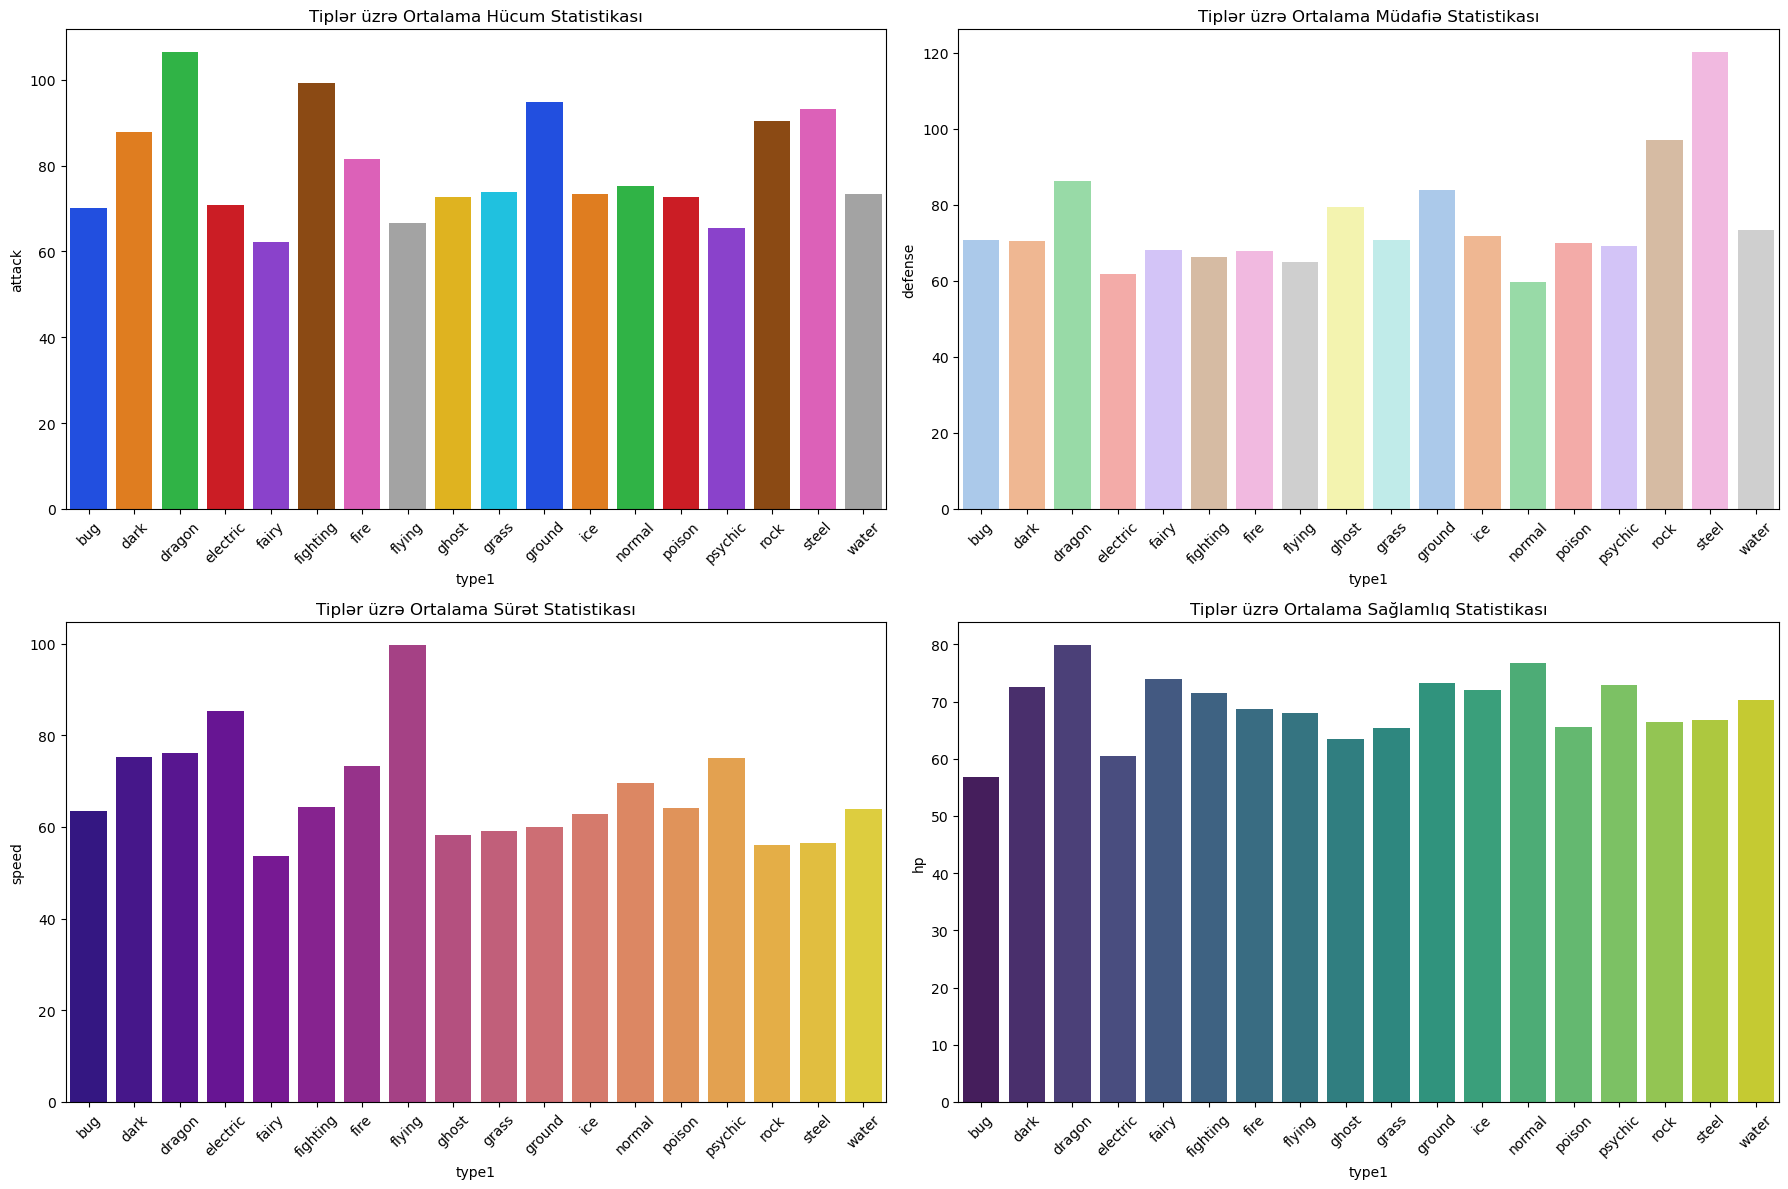

In [27]:
analiz = df.groupby('type1')[['attack', 'defense', 'speed', 'hp']].mean().reset_index()
plt.figure(figsize=(18, 12))
plt.subplot(2, 2, 1)
sns.barplot(data=analiz, x='type1', y='attack', hue='type1', palette='bright', legend=False)
plt.title('Tiplər üzrə Ortalama Hücum Statistikası')
plt.xticks(rotation=45)
plt.subplot(2, 2, 2)
sns.barplot(data=analiz, x='type1', y='defense', hue='type1', palette='pastel', legend=False)
plt.title('Tiplər üzrə Ortalama Müdafiə Statistikası')
plt.xticks(rotation=45)
plt.subplot(2, 2, 3)
sns.barplot(data=analiz, x='type1', y='speed', hue='type1', palette='plasma', legend=False)
plt.title('Tiplər üzrə Ortalama Sürət Statistikası')
plt.xticks(rotation=45)
plt.subplot(2, 2, 4)
sns.barplot(data=analiz, x='type1', y='hp', hue='type1', palette='viridis', legend=False)
plt.title('Tiplər üzrə Ortalama Sağlamlıq Statistikası')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()